In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_data = 'lab1_train.csv' # Change this to the path where you have your data stored.
train_df = pd.read_csv(train_data)
# drop rows with NaN values
train_df = train_df.dropna()
print(train_df.head())


               Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0  22/12/2015 4:00:00 PM  2.470294  261.5804      2     2     1  244.3284   
1  22/12/2015 4:00:01 PM  2.457163  261.1879      2     2     1  244.3284   
2  22/12/2015 4:00:02 PM  2.439548  260.9131      2     2     1  244.3284   
3  22/12/2015 4:00:03 PM  2.428338  260.2850      2     2     1  244.3284   
4  22/12/2015 4:00:04 PM  2.424815  259.8925      2     2     1  244.4245   

    AIT202   AIT203    FIT201  ...  P501  P502    PIT501  PIT502    PIT503  \
0  8.19008  306.101  2.471278  ...     1     1  10.02948     0.0  4.277749   
1  8.19008  306.101  2.468587  ...     1     1  10.02948     0.0  4.277749   
2  8.19008  306.101  2.467305  ...     1     1  10.02948     0.0  4.277749   
3  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   
4  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   

     FIT601  P601  P602  P603  Normal/Attack  
0  0.000256     1    

In [2]:
# Specify the columns for which you want to compute covariance. In this case, we choose all of them. We first need to drop the timestamp and label columns.
train_df = train_df.drop(columns=['Timestamp', 'Normal/Attack'])
correlation_df = train_df.corr()

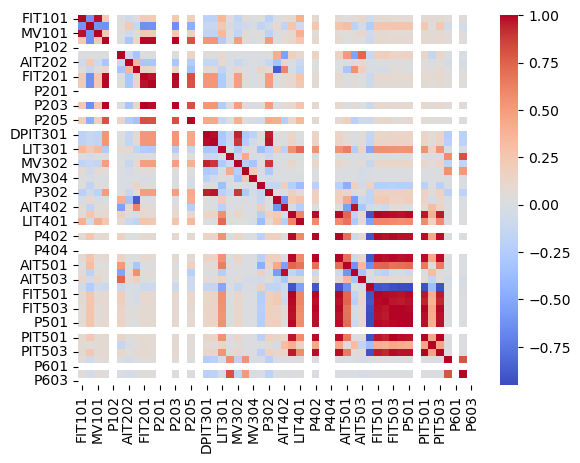

In [3]:
# Now we plot the correlation matrix.
sns.heatmap(correlation_df, annot=False, cmap='coolwarm')
plt.show()

In [4]:
def signal_heatmap(signal= "LIT101", window_shape = 1000, start_index = 1000, end_index = -1):
    # Now we select a column (e.g., LIT101), generate sliding windows of size 20, and compute the correlation matrix between the windows.
    sig = train_df[signal].tolist()
    windows_data = []

    if (end_index == -1): 
        end_index = len(sig)

    windows_data = np.lib.stride_tricks.sliding_window_view(sig[start_index:end_index], window_shape=window_shape)

    windows_df = pd.DataFrame(windows_data)
    windows_correlation_df = windows_df.corr(method="spearman")
    sns.heatmap(windows_correlation_df, annot=False, cmap='coolwarm')
    plt.show()

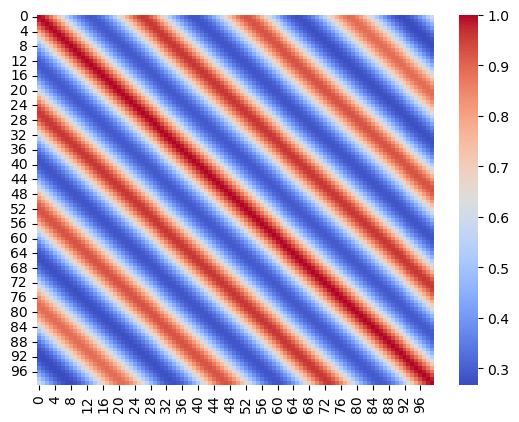

In [5]:
signal_heatmap(signal="FIT101", window_shape=100, start_index=1000)